# Proyecto Sprint 9

## Descrpición del proyecto

**Contexto**

Eres analista en una gran tienda en línea. Junto con el departamento de marketing has recopilado una lista de hipótesis que pueden ayudar a aumentar los ingresos. 

Tienes que priorizar estas hipótesis, lanzar un test A/B y analizar los resultados.

## Análisis exploratorio de datos

In [1]:
# Importación de librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import scipy.stats as stats

### Preprocesamiento de los datos

In [2]:
# Descarga de los datasets

hypotheses = pd.read_csv("https://practicum-content.s3.us-west-1.amazonaws.com/datasets/hypotheses_us.csv", sep = ";" )

orders = pd.read_csv("https://practicum-content.s3.us-west-1.amazonaws.com/datasets/orders_us.csv")

visits = pd.read_csv("https://practicum-content.s3.us-west-1.amazonaws.com/datasets/visits_us.csv")

### hypotheses

In [3]:
# Revisión de dataset hypotheses

hypotheses.columns = hypotheses.columns.str.lower()
hypotheses

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


Solo se tenían columnas con inicial mayúscula, se corrigió a minpuscula. La información restante se encuentra correcta

### orders

In [4]:
# Revisión de dataset orders

display(orders.head())
print()
print(orders.columns)
print()
print(orders.info())
print()
display(orders.describe())
print()
print("Filas duplicadas: ",orders.duplicated().sum())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B



Index(['transactionId', 'visitorId', 'date', 'revenue', 'group'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB
None



,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1197.000000
mean,2.155621e+09,2.165960e+09,131.491646
std,1.229085e+09,1.236014e+09,603.004729
min,1.062393e+06,5.114589e+06,5.000000
25%,1.166776e+09,1.111826e+09,20.800000
50%,2.145194e+09,2.217985e+09,50.200000
75%,3.237740e+09,3.177606e+09,130.400000
max,4.293856e+09,4.283872e+09,19920.400000



Filas duplicadas:  0


In [5]:
# Definir el tipo de valores por columna desde su lectura.

orders = pd.read_csv("https://practicum-content.s3.us-west-1.amazonaws.com/datasets/orders_us.csv",
                    dtype = {"transactionId":"object",
                            "visitorId":"object"},
                    parse_dates = ["date"])

In [6]:
# Revisión de la info del dataset orders nuevamente

print(orders.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   object        
 1   visitorId      1197 non-null   object        
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 46.9+ KB
None


In [7]:
# Renombre de las columnas, cambiando de CamelCase a snake_case

orders = orders.rename(columns={"transactionId":"transaction_id","visitorId":"visitor_id"})

El dataset orders tenía los nombres en camelcase en lugar de snakecase, por lo que se corrigen.

No se tienen filas duplicadas.

En cuanto a los ingresos, se tiene un mínimo de 5 y un máximo de 19920, con un promedio de 131, y una desviación estandar de  603, por lo que a simple vista se puede deducir que hay valores atípicos.

### visits

In [8]:
# Revisión de dataset visits

display(visits.head())
print()
print(visits.columns)
print()
print(visits.info())
print()
display(visits.describe())
print()
print("Filas duplicadas: ",visits.duplicated().sum())

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756



Index(['date', 'group', 'visits'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None



,visits
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000



Filas duplicadas:  0


In [9]:
# Definir el tipo de valores por columna desde su lectura.

visits = pd.read_csv("https://practicum-content.s3.us-west-1.amazonaws.com/datasets/visits_us.csv",
                    parse_dates = ["date"])

In [10]:
# Revisión de la info del dataset orders nuevamente

print(visits.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
None


No se tienen filas duplicadas.

Como mínimo y máximo, se tienen 361 y 770 visitas respectivamene, con una desviación estandar de 114, y un promedio de 607, a simple vista no se ven valores atípicos. Habrá que hacer una revisión mas profunda para comprobarlo. 

### Visitantes/Usuarios por grupo

In [11]:
# Usuarios del grupo A
users_in_group_A = orders[orders["group"] == "A"]

# Usuario del grupo B
users_in_group_B = orders[orders["group"] == "B"]

# Usuarios que se encuentran en ambos grupos
users_in_both_groups = list(set(users_in_group_A["visitor_id"]).intersection(set(users_in_group_B["visitor_id"])))

# Nuevo df de orders solo con usuarios que tienen un solo grupo.b
orders_cleaned = orders[~orders["visitor_id"].isin(users_in_both_groups)].reset_index(drop= True)
orders_cleaned

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,3797467345,1196621759,2019-08-15,155.1,B
3,2282983706,2322279887,2019-08-15,40.5,B
4,182168103,935554773,2019-08-15,35.0,B
...,...,...,...,...,...
1011,3592955527,608641596,2019-08-14,255.7,B
1012,2662137336,3733762160,2019-08-14,100.8,B
1013,2203539145,370388673,2019-08-14,50.1,A
1014,1807773912,573423106,2019-08-14,165.3,A


Se decide eliminar a los usuarios que están en ambos grupos, ya que para que una prueba A/B sea fiable, los usuarios solo deben de estar en un solo grupo.

## Parte 1. Priorizar hipótesis

### Aplicar el framework ICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.

In [12]:
hypotheses["ice_score"] = (hypotheses["impact"] * hypotheses["confidence"]) / hypotheses["effort"]
hypotheses.sort_values(by = "ice_score", ascending = False)

,hypothesis,reach,impact,confidence,effort,ice_score
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000
5,Add a customer review page. This will increase...,3,2,2,3,1.333333
3,Change the category structure. This will incre...,8,3,3,8,1.125000
4,Change the background color on the main page. ...,3,1,1,1,1.000000


### Aplicar el framework RICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.

In [13]:
hypotheses["rice_score"] = (hypotheses["reach"] * hypotheses["impact"] * hypotheses["confidence"] ) / hypotheses["effort"]
hypotheses.sort_values(by = "rice_score", ascending = False)

,hypothesis,reach,impact,confidence,effort,ice_score,rice_score
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0


Existe una diferencia en resultados entre el método ICE y el método RICE, la principal diferecnia radica en que el método RICE considera el alcance (reach), el cual se multiplica a lo que ya se tiene, por tanto aquellas hipótesis con un alto alcance tendrán una prioridad mas alta, en pocas palabras, comparando ICE vs RICE, el parámetro reach definirá la prioridad.

 Por tanto, la hipótesis 7 se toma como la prioridad, al igual en el método ICE la hipótesis 7 se encuentra dentro del top 3, mientras que la hipótesis 8 de ser la número 1 en el método ICE, pasó a la posición 5 con el método RICE, esto debido a que tiene la puntuación mas baja en alcance.

## Parte 2. Análisis de test A/B

### Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas.


In [14]:
# DF con fecha y grupo
datesGroups = orders_cleaned[["date","group"]].drop_duplicates().reset_index(drop= True)

# DF de ingresos acumulados por fecha y número
ordersAggregated = datesGroups.apply(
    lambda x: orders_cleaned[np.logical_and(orders_cleaned["date"] <= x["date"],
                            orders_cleaned["group"] == x["group"])].agg({"date":"max","group":"max", "transaction_id":pd.Series.nunique, "visitor_id":pd.Series.nunique ,"revenue":"sum"})
,axis = 1).sort_values(by =["date","group"])



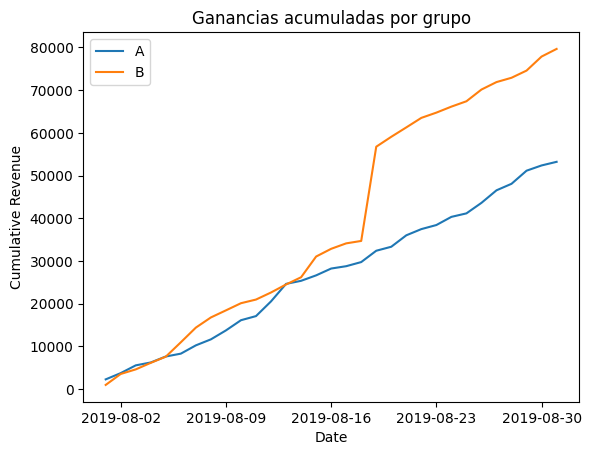

In [15]:
# Ingresos acumulados del grupo A
cumulativeRevenueA = ordersAggregated[ordersAggregated["group"]=="A"][["date","revenue"]]
plt.plot(cumulativeRevenueA["date"], cumulativeRevenueA["revenue"], label = "A")

# Ingresos acumulados del grupo B
cumulativeRevenueB = ordersAggregated[ordersAggregated["group"]=="B"][["date","revenue"]]
plt.plot(cumulativeRevenueB["date"], cumulativeRevenueB["revenue"], label = "B")

# Persoanlización del gráfico
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))
plt.xlabel('Date')
plt.ylabel('Cumulative Revenue')
plt.title('Ganancias acumuladas por grupo')
plt.legend()
plt.show()

Se observan posibles valores atípicos para el grupo B, dado que tiene un brinco muy abrupto, sin embargo, se pudiera considerar una ligera ventaja del grupo B.

### Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas.

In [16]:
# DF de ingresos acumulados por fecha y número
ordersAggregatedMean = datesGroups.apply(
    lambda x: orders_cleaned[np.logical_and(orders_cleaned["date"] <= x["date"],
                            orders_cleaned["group"] == x["group"])].agg({"date":"max","group":"max", "transaction_id":pd.Series.nunique, "visitor_id":pd.Series.nunique ,"revenue":"mean"})
,axis = 1).sort_values(by =["date","group"])

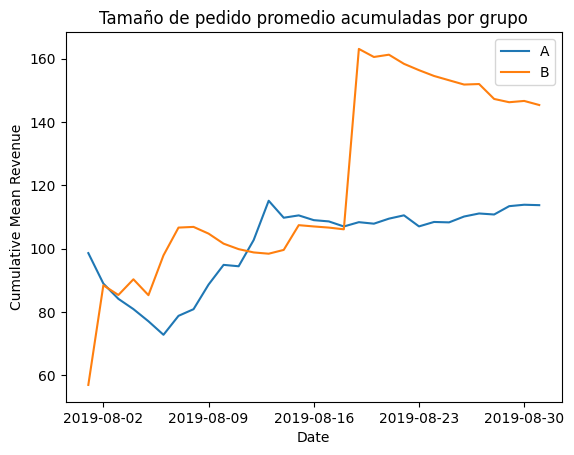

In [17]:
# Ingresos promedio acumulados del grupo A
cumulativeRevenueMeanA = ordersAggregatedMean[ordersAggregatedMean["group"]=="A"][["date","revenue"]]
plt.plot(cumulativeRevenueMeanA["date"], cumulativeRevenueMeanA["revenue"], label = "A")

# Ingresos promedio acumulados del grupo B
cumulativeRevenueMeanB = ordersAggregatedMean[ordersAggregatedMean["group"]=="B"][["date","revenue"]]
plt.plot(cumulativeRevenueMeanB["date"], cumulativeRevenueMeanB["revenue"], label = "B")

# Persoanlización del gráfico
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))
plt.xlabel('Date')
plt.ylabel('Cumulative Mean Revenue')
plt.title('Tamaño de pedido promedio acumuladas por grupo')
plt.legend()
plt.show()

Aún con el promedio acumulado, el brinco del grupo B es muy marcado, sin embargo, se observa al final del mes una estabilización.

### Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.

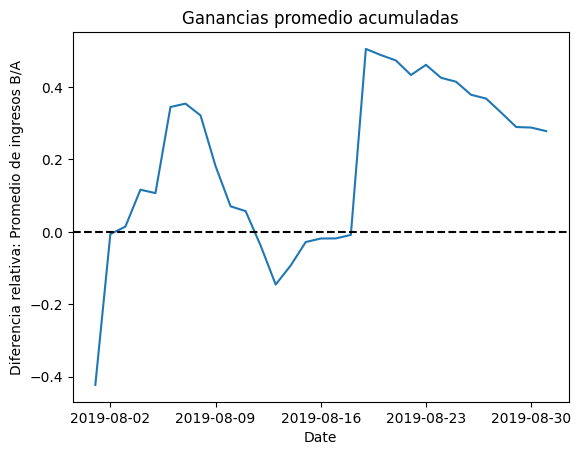

In [18]:
mergedCumulativeRevenueMean =  cumulativeRevenueMeanA.merge(cumulativeRevenueMeanB, on ="date", suffixes= ["A", "B"])

plt.plot(mergedCumulativeRevenueMean["date"], mergedCumulativeRevenueMean["revenueB"]/ mergedCumulativeRevenueMean["revenueA"] - 1)

# Personalización del gráfico
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))
plt.xlabel('Date')
plt.ylabel('Diferencia relativa: Promedio de ingresos B/A')
plt.title('Ganancias promedio acumuladas')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

El gráfico de diferencia relativa muestra aparentemente una ventaja del grupo B, sin emabrgo, si el valor atípico se confirma, es probable que el grupo B tenga un resultado por debajo del grupo A,.

### Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.

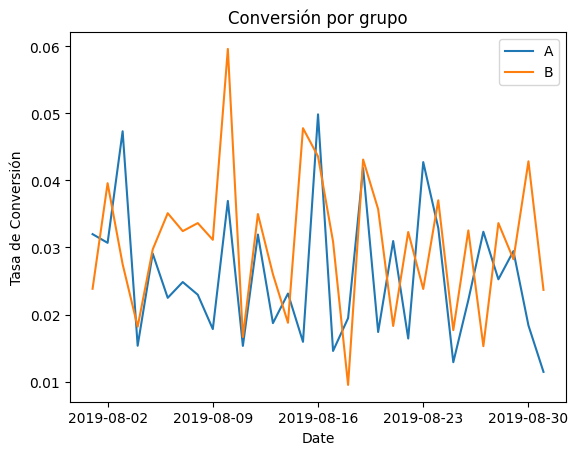

In [19]:
# Información por día y por grupo
ordersAggregated = orders_cleaned.groupby(["date","group"], as_index= False).agg({"revenue":"sum", "transaction_id":pd.Series.nunique, "visitor_id":pd.Series.nunique})
ordersAggregated.columns=["date", "group", "revenue", "orders", "buyers"]

# Unión del df obtenido con visits
data_merged = ordersAggregated.merge(visits, on =("date","group"))

# Cálculo de la conversión
data_merged["conversion"] = data_merged["orders"] / data_merged["visits"]

# Conversión grupo A
conversion_A = data_merged[data_merged["group"] == "A"]
plt.plot(conversion_A["date"], conversion_A["conversion"], label = "A")

# Conversión grupo B
conversion_B = data_merged[data_merged["group"] == "B"]
plt.plot(conversion_B["date"], conversion_B["conversion"], label = "B")

# Personalización del gráfico
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))
plt.xlabel('Date')
plt.ylabel('Tasa de Conversión')
plt.title('Conversión por grupo')
plt.legend()
plt.show()

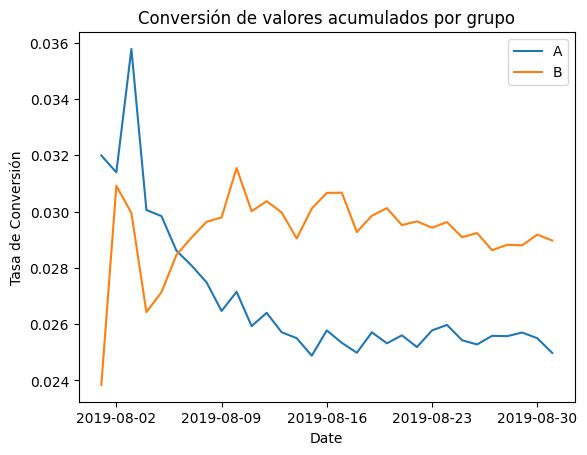

In [20]:
# Información acumulada
cumulative_data = datesGroups.apply(
    lambda x: data_merged[np.logical_and(data_merged["date"] <= x["date"],
                            data_merged["group"] == x["group"])].agg({"date":"max","group":"max", "orders":"sum", "buyers":"sum" ,"revenue":"sum", "visits":"sum"})
,axis = 1).sort_values(by =["date","group"])

# Cálculo de la conversión con valores acumulados
cumulative_data["conversion"] =cumulative_data["orders"] / cumulative_data["visits"]


# Conversión grupo A
cumulative_conversion_A = cumulative_data[cumulative_data["group"] == "A"]
plt.plot(cumulative_conversion_A["date"], cumulative_conversion_A["conversion"], label = "A")

# Conversión grupo B
cumulative_conversion_B = cumulative_data[cumulative_data["group"] == "B"]
plt.plot(cumulative_conversion_B["date"], cumulative_conversion_B["conversion"], label = "B")

# Personalización del gráfico
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))
plt.xlabel('Date')
plt.ylabel('Tasa de Conversión')
plt.title('Conversión de valores acumulados por grupo')
plt.legend()
plt.show()

El gráfico de la conversión simple, no deja claro un comportamiento, dado que no se logra captar un patrón, sin embargo, si vemos la conversión de los datos acumulados,  apesar de que al inicio los resultados parecían favorecer al grupo A, una vez estabilizada la prueba podemos observar que el grupo B tiene una mayor conversión.

### Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas

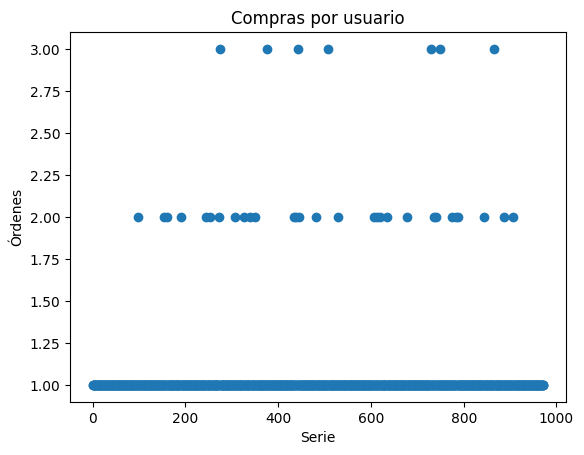

In [21]:
# ördenes por usuario
orders_per_user = orders_cleaned.groupby("visitor_id", as_index = False).agg({"transaction_id":pd.Series.nunique})

# Renombre de columnas
orders_per_user.columns = ["visitor_id", "orders"]

# Creación de la serie para el gráfico de dispersión
x_values_orders = pd.Series(range(0, len(orders_per_user["orders"])))

plt.scatter(x_values_orders, orders_per_user["orders"])
# Personalización del gráfico
plt.xlabel('Serie')
plt.ylabel('Órdenes')
plt.title('Compras por usuario')
plt.show()

La mayor cantidad de usuarios realizar solo una compra, solo una pequeña contidad realiza 2 o mas compras.

### Calcula los percentiles 95 y 99 para el número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [22]:
print("El percentil 95 es: ",np.percentile(orders_per_user["orders"],95))
print("El percentil 99 es: ",np.percentile(orders_per_user["orders"],99))

El percentil 95 es:  1.0
El percentil 99 es:  2.0


Dado que el percentil 95 es 1 y está en el mínimo de compras, tomaremos el percetil 99 como valor a considerar, por tanto deben de ser eliminados todos aquellos usuarios con 2 o mas compras.

### Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.

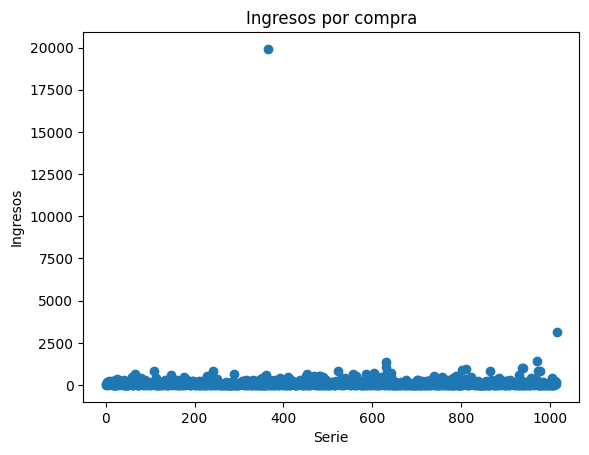

In [23]:
# Creación de serie numerada para poder hacer un gráfico de disperción
x_values = pd.Series(range(0, len(orders_cleaned["revenue"])))

# Creación de gráfico de dispersión
plt.scatter(x_values, orders_cleaned['revenue'])

# Personalización del gráfico
plt.xlabel('Serie')
plt.ylabel('Ingresos')
plt.title('Ingresos por compra')
plt.show()

Con éste gráfico no es muy visible una cantidad, sin embargo se tienen 2 puntos atípicos y la mayoría de las ganancias están por debajo de 2500.

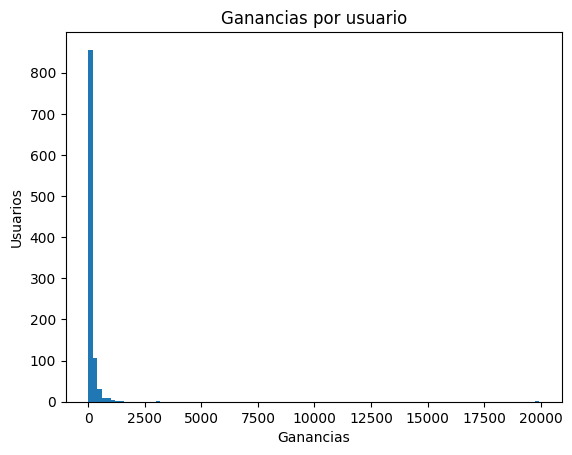

In [24]:
# Histograma
plt.hist(orders_cleaned['revenue'], bins = 100)
# Personalización del gráfico
plt.xlabel('Ganancias')
plt.ylabel('Usuarios')
plt.title('Ganancias por usuario')
plt.show()

El histograma nos muestra información muy parecida al gráfico de dispersión, habrá que eliminar valores atípicos para una mejor visualización

### Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.

In [25]:
# Cálculo de precentiles 95 y 99
print("El percentil 95 es: ",np.percentile(orders_cleaned['revenue'],95))
print("El percentil 99 es: ",np.percentile(orders_cleaned['revenue'],99))

El percentil 95 es:  414.275
El percentil 99 es:  830.3


Eliminaremos los datos que se encuentren por encima de 500, dado que está por encima del percentil 95 y es un número más fácil de manejar.

### Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

In [26]:
# Órdenes de grupo A
ordersByUsersA = orders_cleaned[orders_cleaned["group"] == "A"].groupby(
    "visitor_id", as_index = False).agg({"transaction_id":pd.Series.nunique})
ordersByUsersA.columns = ['visitor_id', 'orders']

# Órdenes de grupo B
ordersByUsersB = orders_cleaned[orders_cleaned["group"] == "B"].groupby(
    "visitor_id", as_index = False).agg({"transaction_id":pd.Series.nunique})
ordersByUsersB.columns = ['visitor_id', 'orders']

# Serie de compras por usuario del grupo A
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(
    0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),
    name='orders')],axis=0)

# Serie de compras por usuario del grupo B
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(
    0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),
    name='orders')],axis=0)

# Obtención del P_value
print("p_value: ",round(stats.mannwhitneyu(sampleA, sampleB)[1],3))

# Relación de promedios
print("Relación B/A: ",round(sampleB.mean()/sampleA.mean() - 1, 3))

p_value:  0.011
Relación B/A:  0.16


El P valor está por debajo del alpha 0.5,por tanto se rechaza la hipótesis nula, por lo que hay evidencia de que las muestras no son iguales, por otro lado, la relación B/A, nos indica que el grupo B está un 16% arriba del grupo A, esto es tomando en cuenta la información con valores atípicos.

### Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.

In [27]:
# Obtención del p valor para los ingresos
print("P_value: ",round(
    stats.mannwhitneyu(
        orders_cleaned[orders_cleaned["group"]=="A"]["revenue"], orders_cleaned[orders_cleaned["group"]=="B"]["revenue"]
    )[1]
,3)
     )

# Relación de promedios de ingresos
print("La relación B/A es: ",round(
    orders_cleaned[orders_cleaned["group"]=="B"]["revenue"].mean() /
    orders_cleaned[orders_cleaned["group"]=="A"]["revenue"].mean() -1
    , 3)
)

P_value:  0.862
La relación B/A es:  0.278


Dado que el P valor se encuentra por encima de alpha 0.5, no se puede rechazar la hipótesis nula, dado que hay evidencia de que los tamaños de las compras son iguales entre ambos grupos.
Por otro lado, el promedio de compra del grupo B es un 27.8% mas alto que el grupo A, esto tomando en cuenta información con valores atípicos.

### Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

In [28]:
# Obtención de usuarios con valores atípicos en números de órdenes y tamaño de compra

# Usuarios 2 o más órdenes
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA["orders"] >= 2]["visitor_id"],
                                ordersByUsersB[ordersByUsersB["orders"] >= 2]["visitor_id"]], axis = 0)

# Usuarios mas de 500 de compra
usersWithExpensiveOrders = orders_cleaned[orders_cleaned["revenue"] > 500 ]["visitor_id"]

# Usuarios que entran en las 2 categorías
abnormalUsers = pd.concat([usersWithManyOrders,usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.shape)

(72,)


In [29]:
# Número de órdenes por usuario del Grupo A eliminando los usuarios con valores atípicos
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA["visitor_id"].isin(abnormalUsers))]["orders"],
                             pd.Series(0, index = np.arange(visits[visits["group"] == "A"]["visits"].sum() - len(ordersByUsersA["orders"])), name= "orders")
                            ], axis= 0)

# Número de órdenes por usuario del Grupo B eliminando los usuarios con valores atípicos
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB["visitor_id"].isin(abnormalUsers))]["orders"],
                             pd.Series(0, index = np.arange(visits[visits["group"] == "B"]["visits"].sum() - len(ordersByUsersB["orders"])), name= "orders")
                            ], axis= 0)


In [30]:
# Obtención del P_value
print("p_value: ",round(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1],3))

# Relación de promedios
print("Relación B/A: ",round(sampleBFiltered.mean()/sampleAFiltered.mean() - 1, 3))

p_value:  0.01
Relación B/A:  0.186


Con los datos filtrados (eliminando atípicos), se obtiene un p valor de  0.01, por lo que se rechaza la hipótesis nula, dado que el p valor es menor de 0.05.Esto nos dice que hay evidencia suficientes para decir que ambos grupos tiene diferencia significativa estadísticamente.

Por otro lado, el grupo B tiene un 18.6% mas de efectividad que el grupo A en cuanto a conversión.

In [31]:
# Tabla comparativa
tabla_conversion = pd.DataFrame({
    "data":["bruto","filtrada"],
    "p_valor":[0.011, 0.01],
    "relación B/A":[0.16, 0.186]
})
tabla_conversion

,data,p_valor,relación B/A
0,bruto,0.011,0.160
1,filtrada,0.010,0.186


En la tabla podemos observar que la información con y sin filtrar muestra resultados muy parecidos en cuanto a la conversión.
En ambas, hay evidencia de que las muestras son diferentes, y en ambas el grupo B tiene una relación de promedios entre el 16 y 19%.

### Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.

In [32]:
# Obtención del p valor para los ingresos
print("P_value: ",round(
    stats.mannwhitneyu(
        orders_cleaned[np.logical_and(orders_cleaned["group"] =="A", np.logical_not(orders_cleaned["visitor_id"].isin(abnormalUsers)))]["revenue"],
        orders_cleaned[np.logical_and(orders_cleaned["group"] =="B", np.logical_not(orders_cleaned["visitor_id"].isin(abnormalUsers)))]["revenue"]
    )[1]
,3)
     )

# Relación de promedios de ingresos
print("La relación B/A es: ",round(
    orders_cleaned[np.logical_and(orders_cleaned["group"]=="B", np.logical_not(orders_cleaned["visitor_id"].isin(abnormalUsers)))]["revenue"].mean() /
    orders_cleaned[np.logical_and(orders_cleaned["group"]=="A", np.logical_not(orders_cleaned["visitor_id"].isin(abnormalUsers)))]["revenue"].mean() -1
    , 3)
)

P_value:  0.992
La relación B/A es:  0.016


Con los datos filtrados (eliminando atípicos), se obtiene un p valor de  0.992, por lo que no se puede rechazar la hipótesis nula, dado que el p valor es mayor de 0.05. Esto nos dice que hay evidencia suficientes para decir que ambos grupos son similares.

Por otro lado, el grupo B tiene solo un 1.6% mas de efectividad que el grupo A en cuanto a conversión.

In [33]:
# Tabla comparativa de promedios
tabla_promedios = pd.DataFrame({
    "data":["bruto","filtrada"],
    "p_valor":[0.862, 0.992],
    "relación B/A":[0.278, 0.016]
})
tabla_promedios

,data,p_valor,relación B/A
0,bruto,0.862,0.278
1,filtrada,0.992,0.016


Eliminando los valores atípicos, nos damos cuenta que las muestras de tamaños de compras siguen siendo muy parecidas entre ellas, sin embargo, la relación cambió bastante, siendo el grupo B solo un 1.6% mejor que el grupo A.

<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Perfecto! Buen trabajo filtrando los datos para calcular su significancia estadística. A veces estos datos atípicos pueden alterar las métricas calculadas causando que la prueba de hipótesis de un p-value alto
</div>

### Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son: 1. Para la prueba, considera a uno de los grupos como líder. 2. Para la prueba, concluye que no hay diferencia entre los grupos. 3. Continúa la prueba.

Se realizarán nuevamente los gráficos iniciales, pero ahora usando la información filtrada, es decir, sin los valores atípicos.

In [34]:
orders_filtered = orders_cleaned[np.logical_not(orders_cleaned["visitor_id"].isin(abnormalUsers))]

In [35]:
# Data filtrada
# DF con fecha y grupo
datesGroups_filtered = orders_filtered[["date","group"]].drop_duplicates().reset_index(drop= True)

# DF de ingresos acumulados por fecha y número
ordersAggregated_filtered = datesGroups_filtered.apply(
    lambda x: orders_filtered[np.logical_and(orders_filtered["date"] <= x["date"],
                            orders_filtered["group"] == x["group"])].agg({"date":"max","group":"max", "transaction_id":pd.Series.nunique, "visitor_id":pd.Series.nunique ,"revenue":"sum"})
,axis = 1).sort_values(by =["date","group"])


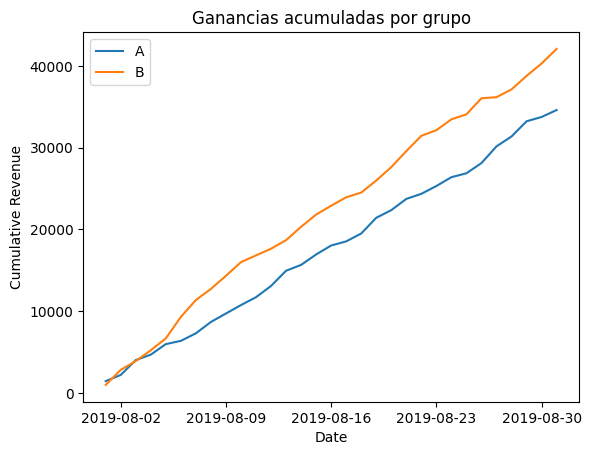

In [36]:
# Data filtrada
# Ingresos acumulados del grupo A
cumulativeRevenueA_filtered = ordersAggregated_filtered[ordersAggregated_filtered["group"]=="A"][["date","revenue"]]
plt.plot(cumulativeRevenueA_filtered["date"], cumulativeRevenueA_filtered["revenue"], label = "A")

# Ingresos acumulados del grupo B
cumulativeRevenueB_filtered = ordersAggregated_filtered[ordersAggregated_filtered["group"]=="B"][["date","revenue"]]
plt.plot(cumulativeRevenueB_filtered["date"], cumulativeRevenueB_filtered["revenue"], label = "B")

# Persoanlización del gráfico
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))
plt.xlabel('Date')
plt.ylabel('Cumulative Revenue')
plt.title('Ganancias acumuladas por grupo')
plt.legend()
plt.show()

In [37]:
# Data filtrada
# DF de ingresos acumulados por fecha y número
ordersAggregatedMean_filtered = datesGroups_filtered.apply(
    lambda x: orders_filtered[np.logical_and(orders_filtered["date"] <= x["date"],
                            orders_filtered["group"] == x["group"])].agg({"date":"max","group":"max", "transaction_id":pd.Series.nunique, "visitor_id":pd.Series.nunique ,"revenue":"mean"})
,axis = 1).sort_values(by =["date","group"])

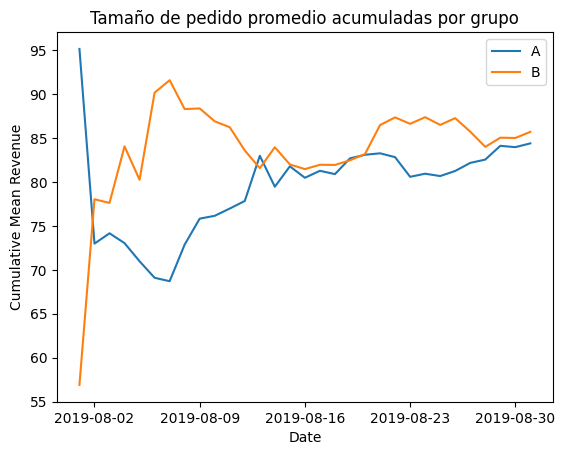

In [38]:
# Data filtrada
# Ingresos promedio acumulados del grupo A
cumulativeRevenueMeanA_filtered = ordersAggregatedMean_filtered[ordersAggregatedMean_filtered["group"]=="A"][["date","revenue"]]
plt.plot(cumulativeRevenueMeanA_filtered["date"], cumulativeRevenueMeanA_filtered["revenue"], label = "A")

# Ingresos promedio acumulados del grupo B
cumulativeRevenueMeanB_filtered = ordersAggregatedMean_filtered[ordersAggregatedMean_filtered["group"]=="B"][["date","revenue"]]
plt.plot(cumulativeRevenueMeanB_filtered["date"], cumulativeRevenueMeanB_filtered["revenue"], label = "B")

# Persoanlización del gráfico
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))
plt.xlabel('Date')
plt.ylabel('Cumulative Mean Revenue')
plt.title('Tamaño de pedido promedio acumuladas por grupo')
plt.legend()
plt.show()

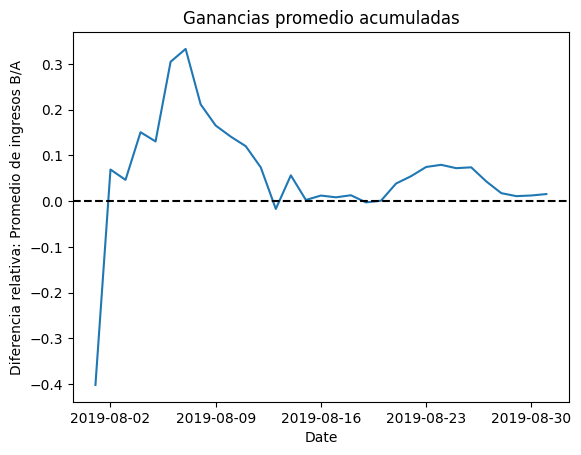

In [39]:
# Data filtrada

# Unión de los df
mergedCumulativeRevenueMean_filtered =  cumulativeRevenueMeanA_filtered.merge(cumulativeRevenueMeanB_filtered, on ="date", suffixes= ["A", "B"])

# Gráfico
plt.plot(mergedCumulativeRevenueMean_filtered["date"], mergedCumulativeRevenueMean_filtered["revenueB"]/ mergedCumulativeRevenueMean_filtered["revenueA"] - 1)

# Personalización del gráfico
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))
plt.xlabel('Date')
plt.ylabel('Diferencia relativa: Promedio de ingresos B/A')
plt.title('Ganancias promedio acumuladas')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

Mi decisión final es:

**Para la prueba, considera a uno de los grupos como líder.**

Esto debido a que el grupo B mostró mejores resutlados en compración con el grupo A antes y después de la información filtrada.
La diferencia relativa no es sumamente grande pero es constantemente mejor que el grupo A.

Por otro lado, las significancias estadísticas no cambiaron antes y después de la eliminación de los atípicos, sin embargo, la diferencia relativa si se vió afectada, teniendo un 26% de diferencia en el tamaño promedio de compra, antes y despues de ser filtrada, sin embargo, ambas con resultados por encima del grupo A.

**Por tanto, considero que hay evidencia para poder detener la prueba y considerarla como un éxito, dado que tiene mejores resultados que el grupo B.**